In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub
import os
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
base_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

# Find the CSV file in the directory
csv_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

if csv_files:
    # Use the first CSV file found
    data = pd.read_csv(csv_files[0], delimiter=',', nrows=None)
    print("Data loaded successfully:")
    print(data)
else:
    print(f"No CSV files found in {base_path}")
    print("Available files:", os.listdir(base_path))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data loaded successfully:
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.0986

Null values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of duplicate rows:
1081

Statistical summary of the dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.

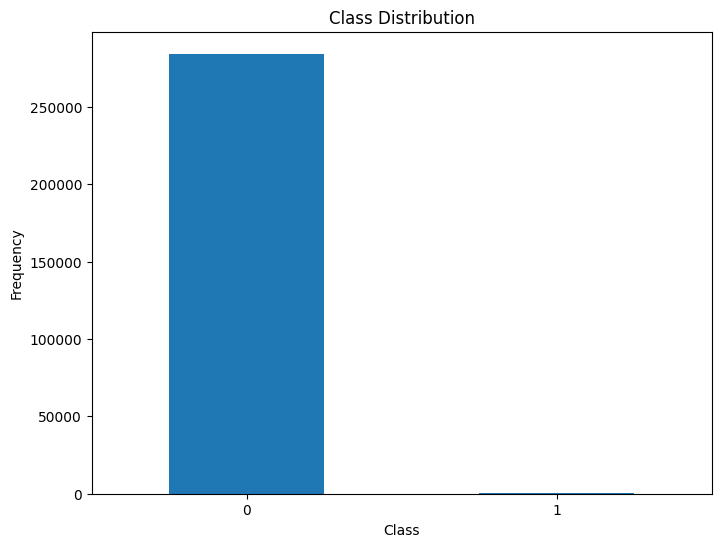

<Figure size 1200x600 with 0 Axes>

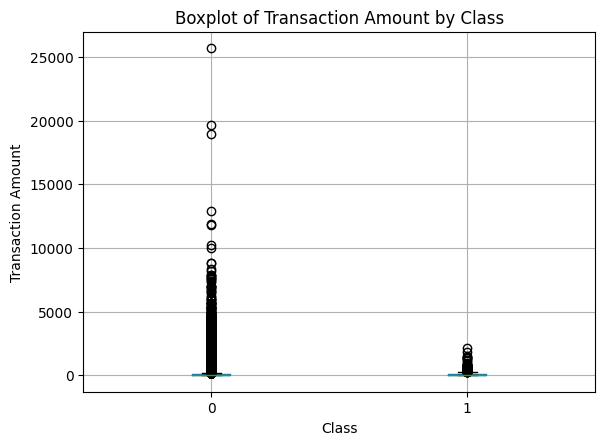

In [11]:
# Check for nulls
print("Null values in each column:")
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

# Check for outliers using describe
print("\nStatistical summary of the dataset:")
print(data.describe())

# Check for class imbalance
print("\nClass distribution:")
print(data['Class'].value_counts())

# Check for class distribution as a percentage
print("\nClass distribution as a percentage:")
print(data['Class'].value_counts() / len(data))

# Additional EDA: Correlation matrix
print("\nCorrelation matrix:")
print(data.corr())

# Additional EDA: Visualizing class distribution
plt.figure(figsize=(8, 6))
data['Class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Additional EDA: Visualizing outliers with boxplots for selected features
plt.figure(figsize=(12, 6))
data.boxplot(column='Amount', by='Class')
plt.title('Boxplot of Transaction Amount by Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()


In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print AUPRC
auprc = average_precision_score(y_test, y_pred_proba)
print(f"\nAUPRC: {auprc:.4f}")


KeyboardInterrupt: 

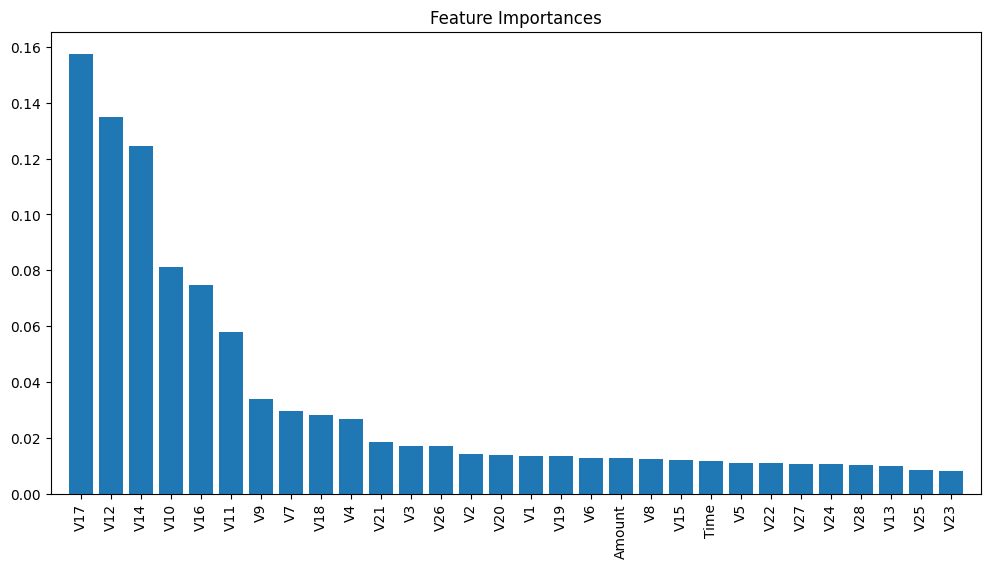

In [5]:
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [6]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

best_rf_classifier = RandomForestClassifier(**grid_search.best_params_)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_rf_classifier.predict(X_test)
y_pred_proba_best = best_rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate and print AUPRC for the best model
auprc_best = average_precision_score(y_test, y_pred_proba_best)
print(f"AUPRC for the best model: {auprc_best:.4f}")
'''


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Oversampling
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler()
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

print(f"Oversampled dataset shape: {X_oversampled.shape}, {y_oversampled.shape}")
print(f"Undersampled dataset shape: {X_undersampled.shape}, {y_undersampled.shape}")


Oversampled dataset shape: (454902, 30), (454902,)
Undersampled dataset shape: (788, 30), (788,)


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Function to create a neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train on oversampled data
model_oversampled = create_model(X_oversampled.shape[1])
model_oversampled.fit(X_oversampled, y_oversampled, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data using the oversampled model
y_pred_oversampled = model_oversampled.predict(X_test)
y_pred_proba_oversampled = y_pred_oversampled.flatten()  # Flatten the predictions

# Calculate and print AUPRC for the oversampled model
auprc_oversampled = average_precision_score(y_test, y_pred_proba_oversampled)
print(f"AUPRC for the oversampled model: {auprc_oversampled:.4f}")

# Train on undersampled data
model_undersampled = create_model(X_undersampled.shape[1])
model_undersampled.fit(X_undersampled, y_undersampled, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data using the undersampled model
y_pred_undersampled = model_undersampled.predict(X_test)
y_pred_proba_undersampled = y_pred_undersampled.flatten()  # Flatten the predictions

# Calculate and print AUPRC for the undersampled model
auprc_undersampled = average_precision_score(y_test, y_pred_proba_undersampled)
print(f"AUPRC for the undersampled model: {auprc_undersampled:.4f}")


C:\Users\16073\MLPractice\venvs\venv3.12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 13s 859us/step - accuracy: 0.7239 - loss: 25.4230
Epoch 2/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 862us/step - accuracy: 0.8925 - loss: 3.4413
Epoch 3/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 857us/step - accuracy: 0.9184 - loss: 0.6018
Epoch 4/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 851us/step - accuracy: 0.9333 - loss: 0.1860
Epoch 5/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 857us/step - accuracy: 0.9368 - loss: 0.1767
Epoch 6/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 855us/step - accuracy: 0.9336 - loss: 0.1837
Epoch 7/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 856us/step - accuracy: 0.9325 - loss: 0.1899
Epoch 8/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 856us/step - accuracy: 0.9329 - loss: 0.1837
Epoch 9/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 855us/step - accuracy: 0.9355 - loss: 0.1742
Epoch 10/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 864us/step - accuracy: 0.9346 - loss: 0.1763
Epoch 11/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 12s 861us/step - accura

C:\Users\16073\MLPractice\venvs\venv3.12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5176 - loss: 352.2500    
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 74.6570 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 35.9719
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 77.3406 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 44.9179 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5387 - loss: 40.2550 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 59.8315 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 34.4575 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6190 - loss: 39.2130
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5380 - loss: 47.1396
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5242 - loss: 68.0875 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [21]:
from keras_tuner import RandomSearch, Objective
import tensorflow as tf

# Function to build the model for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(tf.keras.layers.Input(shape=(X_oversampled.shape[1],)))  # Use Input layer instead of input_dim
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), 
                    activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), 
                    activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=16), 
                    activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR')])  # Change metric to AUPRC
    return model

# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective=Objective("val_AUPRC", direction="max"),  # Specify the objective with direction
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='t1'
)

# Perform the hyperparameter tuning
tuner.search(X_oversampled, y_oversampled, epochs=50, batch_size=32, validation_split=0.2)

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units_1: {best_hyperparameters.get('units_1')}")
print(f"Best units_2: {best_hyperparameters.get('units_2')}")
print(f"Best learning rate: {best_hyperparameters.get('learning_rate')}")




Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |units_1
relu              |relu              |activation_1
128               |128               |units_2
sigmoid           |sigmoid           |activation_2
16                |16                |units_3
relu              |relu              |activation_3
48                |48                |units_4
sigmoid           |sigmoid           |activation_4
0.001             |0.001             |learning_rate

Epoch 1/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - auc: 0.3756 - loss: 0.6646 - val_auc: 1.0000 - val_loss: 1.0596
Epoch 2/50
11333/11373 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.3741 - loss: 0.6628

KeyboardInterrupt: 